In [23]:
import h5py
import numpy as np
import pandas as pd
import matplotlib as m
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
#plt.rcParams["figure.figsize"] = (24, 8)
import seaborn as sns
from scipy import interpolate as interp

In [24]:
justglucose_HB15=pd.read_csv("/Users/jennaisrael/julia/dev/DEBmicroTrait.jl-1/files/output2/basal_medium_justglucose_batch_model_tseries_HB15_20230117.csv")

justglucose_HB15.head() #want the "Name" column for plotting

,time,N_cells,CO2,BGE,rcell,r,E,V
0,0.000000,100.000000,0.000000e+00,1.000000,1.168927e-08,2.055577,0.000009,9.672258e-07
1,0.284703,98.917306,5.379554e-07,0.946766,2.048129e-08,1.801518,0.000008,1.676371e-06
2,0.581081,98.410031,1.351806e-06,0.875642,3.340554e-08,1.465905,0.000007,2.720185e-06
3,1.032452,102.080561,2.982981e-06,0.767978,5.548769e-08,0.977416,0.000005,4.686842e-06
4,1.506928,115.405278,4.977688e-06,0.691593,7.176275e-08,0.672055,0.000004,6.852757e-06


In [25]:
AA_1_HB15=pd.read_csv("/Users/jennaisrael/julia/dev/DEBmicroTrait.jl-1/files/output2/basal_medium_AA_1_batch_model_tseries_HB15_20230117.csv")

AA_1_HB15.head() #want the "Name" column for plotting

,time,N_cells,CO2,BGE,rcell,r,E,V
0,0.000000,100.000000,0.000000e+00,1.000000,2.074765e-07,2.055577,0.000009,9.672258e-07
1,0.297707,100.660773,6.126170e-07,0.940803,3.660754e-07,1.797556,0.000008,1.717868e-06
2,0.647474,103.923769,1.717848e-06,0.854044,6.226304e-07,1.425383,0.000007,3.016506e-06
3,1.192882,120.651633,4.204611e-06,0.735132,1.009623e-06,0.949610,0.000006,5.678733e-06
4,1.738289,157.413175,7.563856e-06,0.668096,1.210111e-06,0.735889,0.000006,8.880249e-06


In [26]:
AA_10_HB15=pd.read_csv("/Users/jennaisrael/julia/dev/DEBmicroTrait.jl-1/files/output2/basal_medium_AA_10_batch_model_tseries_HB15_20230117.csv")

AA_10_HB15.head() #want the "Name" column for plotting

,time,N_cells,CO2,BGE,rcell,r,E,V
0,0.000000,100.000000,0.000000e+00,1.000000,2.308580e-07,2.055577,0.000009,9.672258e-07
1,0.296981,99.073859,5.714855e-07,0.943719,4.129009e-07,1.789783,0.000008,1.713909e-06
2,0.641198,99.094308,1.562765e-06,0.859809,7.145989e-07,1.398998,0.000007,2.966839e-06
3,1.173447,106.568216,3.611698e-06,0.740525,1.199617e-06,0.874346,0.000005,5.356155e-06
4,1.705695,127.291689,6.042303e-06,0.670796,1.475300e-06,0.621082,0.000004,7.867980e-06


In [27]:
AA_100_HB15=pd.read_csv("/Users/jennaisrael/julia/dev/DEBmicroTrait.jl-1/files/output2/basal_medium_AA_100_batch_model_tseries_HB15_20230117.csv")

AA_100_HB15.head() #want the "Name" column for plotting

,time,N_cells,CO2,BGE,rcell,r,E,V
0,0.000000,100.000000,0.000000e+00,1.000000,2.334893e-07,2.055577,0.000009,9.672258e-07
1,0.304904,98.870044,5.857932e-07,0.942279,4.243736e-07,1.780477,0.000008,1.738097e-06
2,0.650705,98.588702,1.579567e-06,0.857893,7.354422e-07,1.383924,0.000007,3.003562e-06
3,1.195360,105.653674,3.646845e-06,0.736993,1.240768e-06,0.848095,0.000005,5.430452e-06
4,1.740015,126.051960,6.062577e-06,0.667889,1.520077e-06,0.597202,0.000004,7.937362e-06


Make some subplots with number of cells, BGE and growth rate 

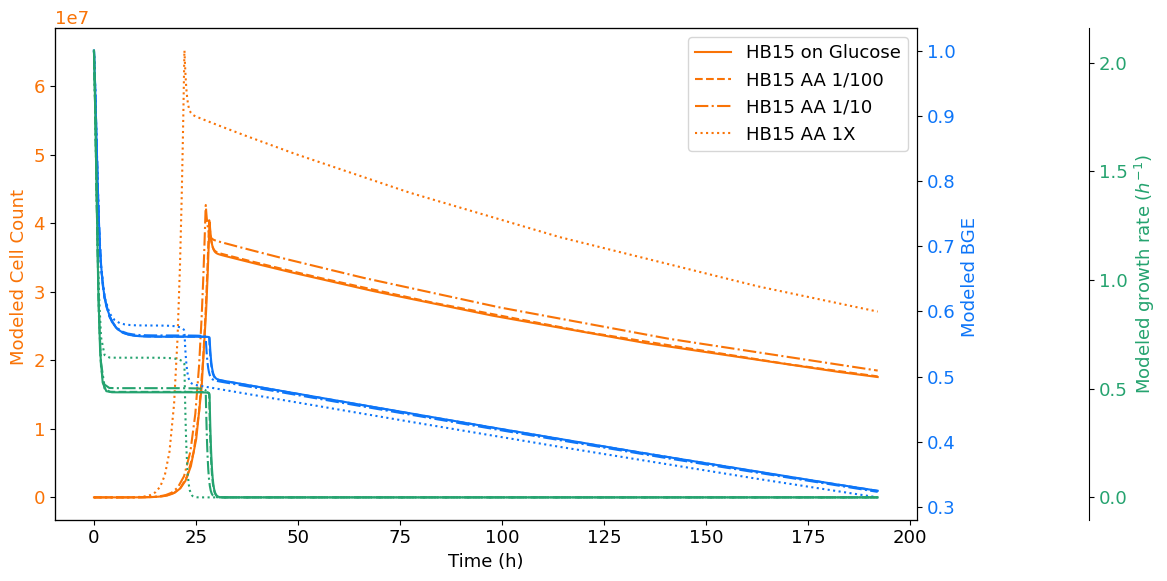

In [28]:
#Make a plot with cell count on y axis 1 and CUE on y axis 2 and cummulative CO2 on y axis 3

#EDIT plot cummulative sum of CO2 instead
#plot the heat dissipation on left y axis for 10^-4 and log(CFU) on right y-axis
#with shaded regions being the SEM

font = {'size': 13}
m.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(12,6))
# fig=plt.figure(figsize=(18,6))

col1='#f97306'
ecol1="#ffb07c"
col2="#0d75f8"
ecol2="#8af1fe"
col3="#25a36f"
ecol3="#98f6b0"


#Cell Count
color = col1
ax1.set_xlabel('Time (h)')
ax1.set_ylabel('Modeled Cell Count ', color=color)
ax1.plot(justglucose_HB15["time"],justglucose_HB15["N_cells"], color=color,linestyle='-',label="HB15 on Glucose")
ax1.plot(AA_100_HB15['time'],AA_100_HB15['N_cells'], color=color,linestyle='--',label="HB15 AA 1/100")
ax1.plot(AA_10_HB15['time'],AA_10_HB15['N_cells'], color=color,linestyle='-.',label="HB15 AA 1/10")
ax1.plot(AA_1_HB15['time'],AA_1_HB15['N_cells'], color=color,linestyle=':',label="HB15 AA 1X")

ax1.tick_params(axis='y', labelcolor=color)
ax1.legend()
#ax1.set_xlim([0, 40])
# plt.ylim([-2,12])

#BGE or CUE
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = col2
ax2.set_xlabel('Time (h)')
ax2.set_ylabel('Modeled BGE ', color=color)
ax2.plot(justglucose_HB15["time"],justglucose_HB15["BGE"], color=color,linestyle='-',label="HB15 on Glucose")
ax2.plot(AA_100_HB15['time'],AA_100_HB15['BGE'], color=color,linestyle='--',label="HB15 AA 1/100")
ax2.plot(AA_10_HB15['time'],AA_10_HB15['BGE'], color=color,linestyle='-.',label="HB15 AA 1/10")
ax2.plot(AA_1_HB15['time'],AA_1_HB15['BGE'], color=color,linestyle=':',label="HB15 AA 1X")
ax2.tick_params(axis='y', labelcolor=color)
#ax2.legend()

#CO2 production, need to offset this axis
ax3=ax1.twinx()
ax3.spines.right.set_position(("axes", 1.2))

color = col3
# ax3.set_ylabel(r'Modeled cummulative $CO_2$ Production (mM)', color=color)  # we already handled the x-label with ax1
ax3.set_ylabel(r"Modeled growth rate ($h^{-1}$)", color=color)  # we already handled the x-label with ax1
ax3.plot(justglucose_HB15["time"],justglucose_HB15["r"], color=color,linestyle='-',label="HB15 on Glucose")
ax3.plot(AA_100_HB15['time'],AA_100_HB15['r'], color=color,linestyle='--',label="HB15 AA 1/100")
ax3.plot(AA_10_HB15['time'],AA_10_HB15['r'], color=color,linestyle='-.',label="HB15 AA 1/10")
ax3.plot(AA_1_HB15['time'],AA_1_HB15['r'], color=color,linestyle=':',label="HB15 AA 1X")

ax3.tick_params(axis='y', labelcolor=color)

# # ax4=ax1.twinx()

# ################################################################################
# # Create each entry for legend of colors
# # new_color = mpatches.Patch(color='HEX CODE HERE', label='LABEL NAME HERE')
# red_patch = mpatches.Patch(color=col1, label='Cell Count')
# blue_patch = mpatches.Patch(color=col2, label='Uptake Rate/Cell')
# green_patch = mpatches.Patch(color=col3, label=r'Cummulative $CO_2$')

# # Create each entry for legend of linestyles
# # new_style = Line2D([0], [0], linewidth=3, color='black', linestyle='LINESTYLE HERE', label='LABEL NAME HERE')
# dotted_patch = Line2D([0], [0], linewidth=3, color='black', linestyle='--', label='Strain 1')
# dotted_patch2 = Line2D([0], [0], linewidth=3, color='black', linestyle=':', label='Strain 2')

# # Create legend of colors
# ax3.add_artist(plt.legend(handles=[red_patch, blue_patch, green_patch],loc='lower right'))
#     # replace `plt.gca()` with suplot axs object
#     # loc = location

# # Create legend of linestyles
# ax3.add_artist(plt.legend(handles=[dotted_patch,dotted_patch2], loc='upper left'))



fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


Plot Structure, reserve, and 'Modeled Uptake Rate/Cell [mol-C/mol reserve/ h/ cell]'

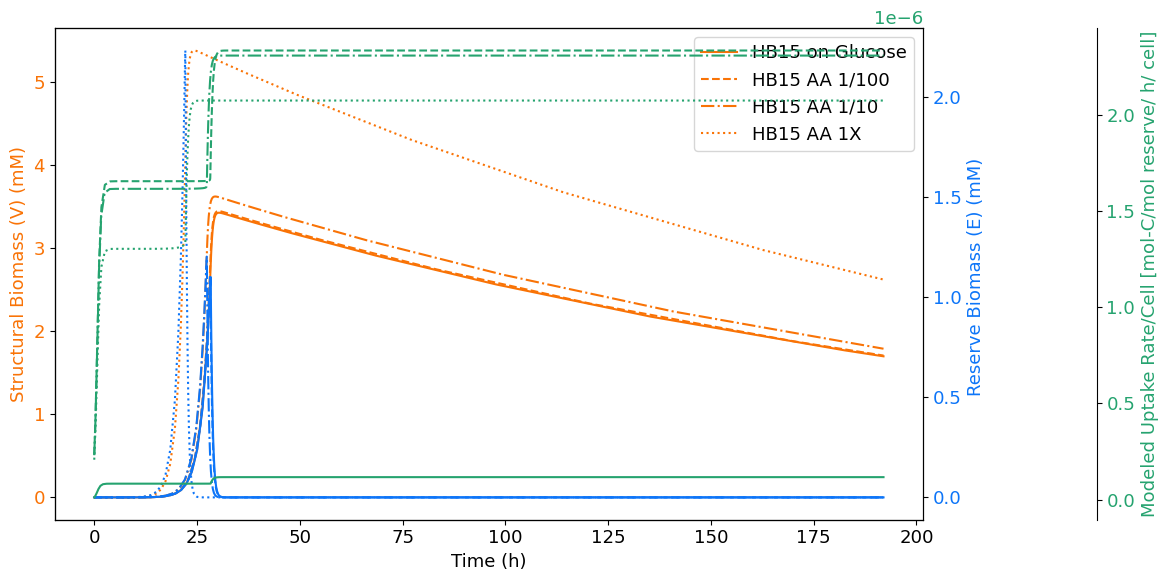

In [29]:
#Make a plot with cell count on y axis 1 and CUE on y axis 2 and cummulative CO2 on y axis 3

#EDIT plot cummulative sum of CO2 instead
#plot the heat dissipation on left y axis for 10^-4 and log(CFU) on right y-axis
#with shaded regions being the SEM

font = {'size': 13}
m.rc('font', **font)
fig, ax1 = plt.subplots(figsize=(12,6))
# fig=plt.figure(figsize=(18,6))

col1='#f97306'
ecol1="#ffb07c"
col2="#0d75f8"
ecol2="#8af1fe"
col3="#25a36f"
ecol3="#98f6b0"


#Cell Count
color = col1
ax1.set_xlabel('Time (h)')
ax1.set_ylabel('Structural Biomass (V) (mM)', color=color)
ax1.plot(justglucose_HB15["time"],justglucose_HB15["V"], color=color,linestyle='-',label="HB15 on Glucose")
ax1.plot(AA_100_HB15['time'],AA_100_HB15['V'], color=color,linestyle='--',label="HB15 AA 1/100")
ax1.plot(AA_10_HB15['time'],AA_10_HB15['V'], color=color,linestyle='-.',label="HB15 AA 1/10")
ax1.plot(AA_1_HB15['time'],AA_1_HB15['V'], color=color,linestyle=':',label="HB15 AA 1X")
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend()
#ax1.set_xlim([0, 40])
# plt.ylim([-2,12])

#BGE or CUE
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = col2
ax2.set_xlabel('Time (h)')
ax2.set_ylabel('Reserve Biomass (E) (mM) ', color=color)
ax2.plot(justglucose_HB15["time"],justglucose_HB15["E"], color=color,linestyle='-',label="HB15 on Glucose")
ax2.plot(AA_100_HB15['time'],AA_100_HB15['E'], color=color,linestyle='--',label="HB15 AA 1/100")
ax2.plot(AA_10_HB15['time'],AA_10_HB15['E'], color=color,linestyle='-.',label="HB15 AA 1/10")
ax2.plot(AA_1_HB15['time'],AA_1_HB15['E'], color=color,linestyle=':',label="HB15 AA 1X")
ax2.tick_params(axis='y', labelcolor=color)
#ax2.legend()

#CO2 production, need to offset this axis
ax3=ax1.twinx()
ax3.spines.right.set_position(("axes", 1.2))

color = col3
ax3.set_ylabel(r'Modeled Uptake Rate/Cell [mol-C/mol reserve/ h/ cell]', color=color)  # we already handled the x-label with ax1
#ax3.set_ylabel(r"Modeled growth rate ($h^{-1}$)", color=color)  # we already handled the x-label with ax1
ax3.plot(justglucose_HB15["time"],justglucose_HB15["rcell"], color=color,linestyle='-',label="HB15 on Glucose")
ax3.plot(AA_100_HB15['time'],AA_100_HB15['rcell'], color=color,linestyle='--',label="HB15 AA 1/10")
ax3.plot(AA_10_HB15['time'],AA_10_HB15['rcell'], color=color,linestyle='-.',label="HB15 AA 1/10")
ax3.plot(AA_1_HB15['time'],AA_1_HB15['rcell'], color=color,linestyle=':',label="HB15 AA 1X")

ax3.tick_params(axis='y', labelcolor=color)

# # ax4=ax1.twinx()

# ################################################################################
# # Create each entry for legend of colors
# # new_color = mpatches.Patch(color='HEX CODE HERE', label='LABEL NAME HERE')
# red_patch = mpatches.Patch(color=col1, label='Cell Count')
# blue_patch = mpatches.Patch(color=col2, label='Uptake Rate/Cell')
# green_patch = mpatches.Patch(color=col3, label=r'Cummulative $CO_2$')

# # Create each entry for legend of linestyles
# # new_style = Line2D([0], [0], linewidth=3, color='black', linestyle='LINESTYLE HERE', label='LABEL NAME HERE')
# dotted_patch = Line2D([0], [0], linewidth=3, color='black', linestyle='--', label='Strain 1')
# dotted_patch2 = Line2D([0], [0], linewidth=3, color='black', linestyle=':', label='Strain 2')

# # Create legend of colors
# ax3.add_artist(plt.legend(handles=[red_patch, blue_patch, green_patch],loc='lower right'))
#     # replace `plt.gca()` with suplot axs object
#     # loc = location

# # Create legend of linestyles
# ax3.add_artist(plt.legend(handles=[dotted_patch,dotted_patch2], loc='upper left'))



fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [32]:
#pathstr="/Users/jennaisrael/julia/dev/DEBmicroTrait.jl-1/files/output/isolates_assimilation.jld"
pathstr="/Users/jennaisrael/julia/dev/DEBmicroTrait.jl-1/files/output/isolates_assimilation_basal_medium_AA_10.jld"
f=h5py.File(pathstr,"r")#, "rho", ρ_ps, "NSB", N_SB, "KD", K_D, "yEM", y_EM, "yDE", y_DEs, "NC", N_C)
K_D=np.array(f['KD']) #K_D for 39 strains on the 20 substrates
#pull row 30 corresponding to HB15
print(K_D[29,:])

[0.01335536 0.06649137 0.06755976 0.06416574 0.05348023 0.05348023
 0.06084609 0.0562052  0.03700017 0.0871747  0.03246651 0.03840942
 0.06372721 0.36905978 0.11780308 0.1031536  0.10345455 0.07298796
 0.06330449 0.14109603]


In [34]:
pathstr="/Users/jennaisrael/julia/dev/DEBmicroTrait.jl-1/files/output/isolates_assimilation_basal_medium.jld"
f=h5py.File(pathstr,"r")#, "rho", ρ_ps, "NSB", N_SB, "KD", K_D, "yEM", y_EM, "yDE", y_DEs, "NC", N_C)
K_D=np.array(f['KD']) #K_D for 39 strains on the 20 substrates
#pull row 30 corresponding to HB15
print(K_D[29,:])

[0.01335536]
